# Задание 1

Гистограмма и первые 5 строк

         Height    Weight
Index                    
1      65.78331  112.9925
2      71.51521  136.4873
3      69.39874  153.0269
4      68.21660  142.3354
5      67.78781  144.2971


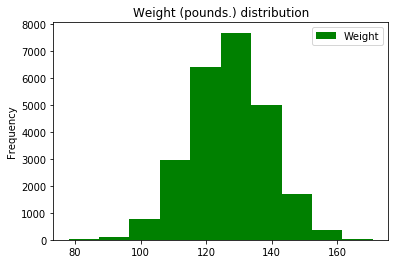

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as opt
import matplotlib.patches as mpatches

%matplotlib inline
path = "/Users/nikita/PycharmProjects/ML_Tasks/course2/week1/weights_heights.csv"
data = pd.read_csv(path, index_col='Index')
# SubTask 2
data.plot(y='Weight', kind='hist',
          color='green', title='Weight (pounds.) distribution')
print(data.head())
plt.show()

Попарные распределния:

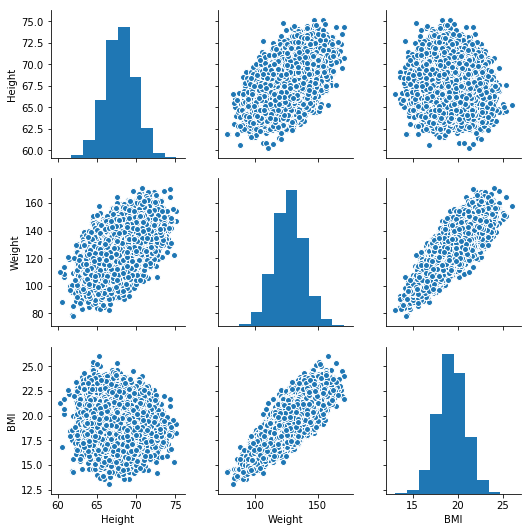

In [3]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2


data['BMI'] = data.apply(lambda row: make_bmi(row['Height'],
                                              row['Weight']), axis=1)
sns.pairplot(data=data)
plt.show()

Зависимость роста от весовой категории:

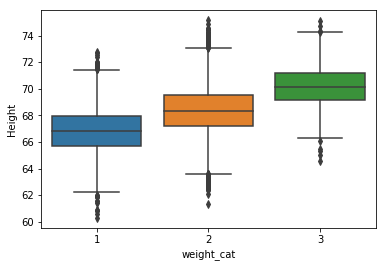

In [4]:
def weight_category(weight):
    if weight < 120:
        return 1
    if weight >= 150:
        return 3
    return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
sns.boxplot(x = data['weight_cat'], y = data['Height'])
plt.show()

Scatter plot зависимости роста от веса

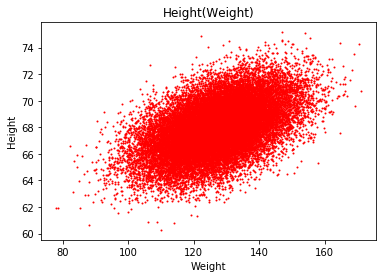

In [5]:
data.plot.scatter(y='Height', x='Weight', color='red', title='Height(Weight)', s=1)

Прямые через поле

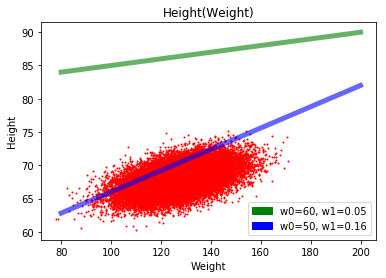

In [4]:
def line(x, w0, w1):
    return w0 + w1 * x

def draw_lines_and_scatter(scat_df, X, lines, patches):
    data.plot.scatter(y='Height', x='Weight', color='red', title='Height(Weight)', s=1)
    for line in lines:
        plt.plot(X, line[0], 'r-', lw=5, alpha=0.6, color=line[1])
    plt.legend(handles=patches)
    plt.show()

#Draw lines on scatter
lines = []
patches = []
weight_b = (80, 200)
X = np.linspace(weight_b[0], weight_b[1])
lines.append(([line(x, weight_b[0], 0.05) for x in X],"green"))
patches.append(mpatches.Patch(color='green', label='w0=60, w1=0.05'))
lines.append(([line(x, 50, 0.16) for x in X], "blue"))
patches.append(mpatches.Patch(color='blue', label='w0=50, w1=0.16'))
draw_lines_and_scatter(data, X, lines, patches)


График ошибки:

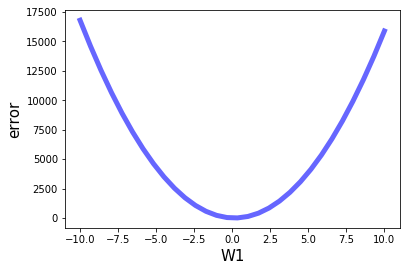

In [6]:
def err(data_frame, w0, w1, y_col='Height', x_col='Weight'):
    n = data_frame.shape[0]
    error = 0
    i = 0
    # get each 100th row, for speed
    step = 100
    while i < n / step:
        row = data.iloc[[i * step]]
        y = row[y_col].values[0]
        x = row[x_col].values[0]
        error = error + (y - (w0 + w1 * x)) ** 2
        i = i + 1
    return error / n

err_w1  = lambda w1: err(data, 50, w1)
W1 = np.linspace(-10, 10, 30)
plt.xlabel('W1', fontsize=15)
plt.ylabel('error', fontsize=15)
plt.plot(W1, [err_w1(w1) for w1 in W1], lw=5, alpha=0.6,  color='blue')
plt.show()


Поиск оптимального W1 при W0=50

W1 OPTIMAL= 0.13983094983598052


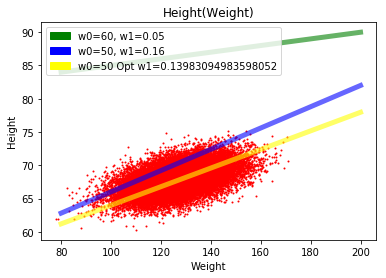

In [8]:
w1_opt = opt.minimize_scalar(err_w1)
print("W1 OPTIMAL=", w1_opt.x)
#optimal w1 line
lines.append(([line(x, 50, w1_opt.x) for x in X], "yellow"))
patches.append(mpatches.Patch(color='yellow', label= "w0=50" + ' Opt w1=' + str(w1_opt.x)))
draw_lines_and_scatter(data, X, lines, patches)


Трехмерное распределение ошибки

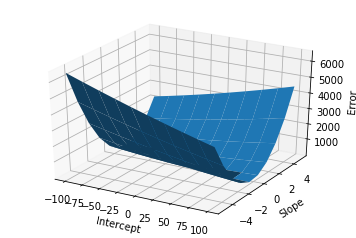

In [11]:
from mpl_toolkits.mplot3d import Axes3D
def err_w0_w1(w0_, w1_): return err(data, w0_, w1_)
fig = plt.figure()
ax = fig.gca(projection='3d')  # get current axis
size = 10
W0 = np.linspace(-100, 100, size)
W1 = np.linspace(-5, 5, size)
X, Y = np.meshgrid(W0, W1)
Z = np.array([err_w0_w1(x, y) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()


Поиск оптимальных W0 и W1

W0,W1 OPTIMAL= [59.78865459  0.06351619]


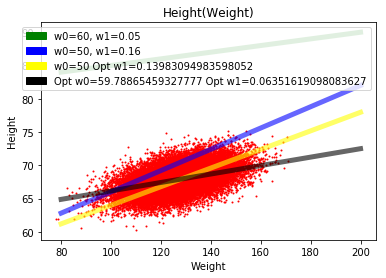

In [12]:
from scipy.optimize import minimize
def error_for_opt(W):
    return err(data, W[0], W[1])
x0 = np.array([0,0])
res = minimize(error_for_opt, x0, method='L-BFGS-B')
print("W0,W1 OPTIMAL=", res.x)
#draw what we had
X = np.linspace(weight_b[0], weight_b[1])
lines.append(([line(x, res.x[0], res.x[1]) for x in X], "black"))
patches.append(mpatches.Patch(color='black', label='Opt w0=' + str(res.x[0]) +
                                                    ' Opt w1=' + str(res.x[1])))
draw_lines_and_scatter(data, X, lines, patches)